In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub
import tf_keras

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf_keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])


In [ ]:
gr = Image.open('/content/Dog Breed Classification/train/borzoi/borzoi10.jpg').resize((224,224))

In [ ]:
gr = np.array(gr)/255.0
gr.shape

In [ ]:
gr[np.newaxis, ...]

In [ ]:
result = classifier.predict(gr[np.newaxis, ...])
result.shape

In [ ]:
predicted_label_index = np.argmax(result)
predicted_label_index

In [ ]:
tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

In [ ]:
#ImageNetLabels.txt in this directory

import urllib.request

# Download the file from the URL
url = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
filename = 'ImageNetLabels.txt'

try:
    urllib.request.urlretrieve(url, filename)
    print(f"Downloaded {filename} successfully.")
except Exception as e:
    print(f"Error downloading {filename}: {e}")

Downloaded ImageNetLabels.txt successfully.


In [ ]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [ ]:
image_labels[predicted_label_index]

In [2]:
!pip install kaggle

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d asdasdasasdas/garbage-classification
!unzip garbage-classification.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification
License(s): copyright-authors
garbage-classification.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  garbage-classification.zip
replace Garbage classification/Garbage classification/cardboard/cardboard1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Garbage classification/Garbage classification/cardboard/cardboard10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

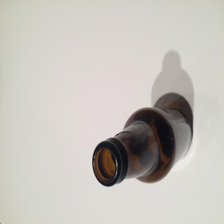

In [ ]:
gr = Image.open('/content/garbage classification/Garbage classification/glass/glass1.jpg').resize((224,224))
gr

In [ ]:
data_dir = '/content/garbage classification/Garbage classification'

In [ ]:
data_dir

'/content/garbage classification/Garbage classification'

In [3]:
import pathlib
data_dir = pathlib.Path('/content/garbage classification/Garbage classification')
data_dir

PosixPath('/content/garbage classification/Garbage classification')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/content/garbage classification/Garbage classification/glass/glass170.jpg'),
 PosixPath('/content/garbage classification/Garbage classification/glass/glass40.jpg'),
 PosixPath('/content/garbage classification/Garbage classification/glass/glass337.jpg'),
 PosixPath('/content/garbage classification/Garbage classification/glass/glass423.jpg'),
 PosixPath('/content/garbage classification/Garbage classification/glass/glass492.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2527


In [ ]:
glass = list(data_dir.glob('glass/*'))
glass[:5]

[PosixPath('/content/garbage classification/Garbage classification/glass/glass170.jpg'),
 PosixPath('/content/garbage classification/Garbage classification/glass/glass40.jpg'),
 PosixPath('/content/garbage classification/Garbage classification/glass/glass337.jpg'),
 PosixPath('/content/garbage classification/Garbage classification/glass/glass423.jpg'),
 PosixPath('/content/garbage classification/Garbage classification/glass/glass492.jpg')]

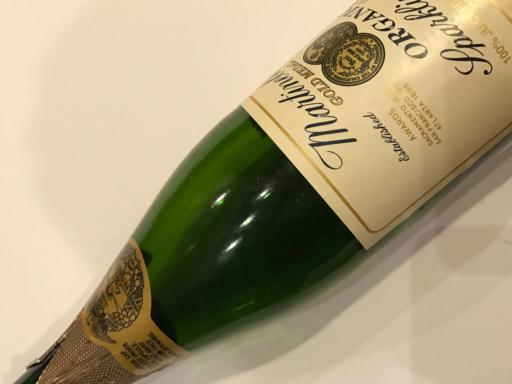

In [ ]:
import PIL
PIL.Image.open(str(glass[1]))

In [4]:
garbage_images_dict = {
    'glass': list(data_dir.glob('glass/*')),
    'metal': list(data_dir.glob('metal/*')),
    'paper': list(data_dir.glob('paper/*')),
    'plastic': list(data_dir.glob('plastic/*')),
    'trash': list(data_dir.glob('trash/*')),
}

In [5]:
garbage_labels_dict = {
    'glass': 0,
    'metal': 1,
    'paper': 2,
    'plastic': 3,
    'trash': 4,
}


In [ ]:
garbage_images_dict['paper'][:5]

[PosixPath('/content/garbage classification/Garbage classification/paper/paper81.jpg'),
 PosixPath('/content/garbage classification/Garbage classification/paper/paper494.jpg'),
 PosixPath('/content/garbage classification/Garbage classification/paper/paper168.jpg'),
 PosixPath('/content/garbage classification/Garbage classification/paper/paper217.jpg'),
 PosixPath('/content/garbage classification/Garbage classification/paper/paper193.jpg')]

In [6]:
X, y = [], []

for garbage_name, images in garbage_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(garbage_labels_dict[garbage_name])

In [7]:
X = np.array(X)
y = np.array(y)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
X[0].shape

(224, 224, 3)

In [ ]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

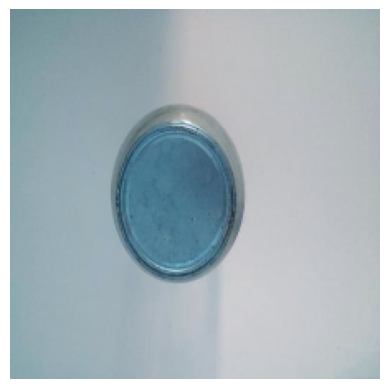

In [ ]:
plt.axis('off')
plt.imshow(X[0])

In [ ]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 2s 2s/step


array([905, 722, 906])

In [ ]:
image_labels[905]

'window screen'

In [10]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [11]:
model = tf_keras.Sequential([
  pretrained_model_without_top_layer,
  tf_keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [16]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

model.fit(
    X_train_scaled, y_train,
    epochs=15,
    validation_split=0.1
)

Epoch 1/15
45/45 [==============================] - 5s 69ms/step - loss: 0.2066 - accuracy: 0.9421 - val_loss: 0.5747 - val_accuracy: 0.7750
Epoch 2/15
45/45 [==============================] - 2s 47ms/step - loss: 0.1699 - accuracy: 0.9609 - val_loss: 0.6067 - val_accuracy: 0.7875
Epoch 3/15
45/45 [==============================] - 2s 50ms/step - loss: 0.1510 - accuracy: 0.9693 - val_loss: 0.6134 - val_accuracy: 0.7875
Epoch 4/15
45/45 [==============================] - 2s 52ms/step - loss: 0.1313 - accuracy: 0.9763 - val_loss: 0.5940 - val_accuracy: 0.7875
Epoch 5/15
45/45 [==============================] - 2s 46ms/step - loss: 0.1206 - accuracy: 0.9839 - val_loss: 0.6804 - val_accuracy: 0.7688
Epoch 6/15
45/45 [==============================] - 2s 49ms/step - loss: 0.1126 - accuracy: 0.9839 - val_loss: 0.5977 - val_accuracy: 0.7812
Epoch 7/15
45/45 [==============================] - 2s 47ms/step - loss: 0.0977 - accuracy: 0.9902 - val_loss: 0.6292 - val_accuracy: 0.7750
Epoch 8/15
45

In [17]:
model.evaluate(X_test_scaled,y_test)

17/17 [==============================] - 1s 42ms/step - loss: 0.5104 - accuracy: 0.8267


[0.5104068517684937, 0.8267419934272766]

In [19]:
# Garbage labels
garbage_labels = ['glass', 'metal', 'paper', 'plastic', 'trash']

def classify_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return "Error: Unable to read the image."

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (224, 224)) / 255.0
    img_array = np.expand_dims(img_resized, axis=0)

    # Predict the class
    predictions = model.predict(img_array)
    predicted_label = garbage_labels[np.argmax(predictions)]

    return predicted_label


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [20]:
image_path = '/content/metal plate.jpg'
result = classify_image(image_path)
print(f"The image is classified as: {result}")


1/1 [==============================] - 1s 940ms/step
The image is classified as: metal


In [22]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [23]:
import gradio as gr

def gradio_classify(image):
    img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    temp_path = 'temp.jpg'
    cv2.imwrite(temp_path, img)
    return classify_image(temp_path)


ui = gr.Interface(
    fn=gradio_classify,
    inputs=gr.Image(type="pil"),
    outputs="label",
    title="Garbage Classification")

ui.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6366ef513629cc8f83.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [24]:
from tensorflow.keras import layers, models, datasets, utils
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(224,224,3)))
model2.add(layers.MaxPooling2D(2,2))
model2.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model2.add(layers.MaxPooling2D(2,2))
model2.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(32, activation = 'relu'))
model2.add(layers.Dense(5, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:

model2.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['acc'])

model2.fit(
    X_train_scaled, y_train,
    epochs=15,
    validation_split=0.1
)

Epoch 1/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - acc: 0.2394 - loss: 1.6780 - val_acc: 0.3875 - val_loss: 1.4599
Epoch 2/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - acc: 0.4162 - loss: 1.3566 - val_acc: 0.4563 - val_loss: 1.3688
Epoch 3/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 0.5136 - loss: 1.1928 - val_acc: 0.4375 - val_loss: 1.3295
Epoch 4/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - acc: 0.5652 - loss: 1.0445 - val_acc: 0.5312 - val_loss: 1.1972
Epoch 5/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - acc: 0.6441 - loss: 0.8912 - val_acc: 0.5250 - val_loss: 1.2010
Epoch 6/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - acc: 0.6945 - loss: 0.7550 - val_acc: 0.5375 - val_loss: 1.2981
Epoch 7/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - acc: 0.7610 - loss: 0.5954 - val_acc: 0.5625 - val_loss: 1.3185
Epoch 8/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - acc: 0.8408 - loss: 0.4672 - val_acc: 0.5500 - val_loss: 1.6377
Epoch 9/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - acc: 0.84

In [26]:
model2.evaluate(X_test_scaled,y_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - acc: 0.5170 - loss: 2.9876


[3.165264129638672, 0.5065913200378418]

In [ ]:
'''
I compiled it the same way as the transfer learning model, trained it for 15 epochs, and got an accuracy of just 51.7% with a loss of 2.98.
This result is barely better than random guessing and demonstrates how poorly the model performs when trained from scratch on a small dataset.
The high loss and low accuracy highlight that the model is underfitting,
 as it struggles to learn meaningful patterns due to the lack of pre-trained knowledge and insufficient data.

And even if the model did not underfit and was able to achieve a similar accuracy,
 it would have taken significantly more time and a lot more epochs to reach that point, making it inefficient compared to the transfer learning approach.
'''